<a href="https://colab.research.google.com/github/Jaskirat1/AIT_NLP/blob/main/Language_identificationNLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import json

In [3]:
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import classification_report


In [23]:
import re 
import nltk
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [5]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
%matplotlib inline

In [6]:
data = pd.read_csv('dataset.csv')

In [39]:
data.head()

,Text,language
0,klement gottwaldi surnukeha palsameeriti ning ...,Estonian
1,sebes joseph pereira thomas på eng the jesuit...,Swedish
2,ถนนเจริญกรุง อักษรโรมัน thanon charoen krung เ...,Thai
3,விசாகப்பட்டினம் தமிழ்ச்சங்கத்தை இந்துப் பத்திர...,Tamil
4,de spons behoort tot het geslacht haliclona en...,Dutch


In [9]:
data.shape

(22000, 2)

In [10]:
data.columns

Index(['Text', 'language'], dtype='object')

In [11]:
data['language'].unique()

array(['Estonian', 'Swedish', 'Thai', 'Tamil', 'Dutch', 'Japanese',
       'Turkish', 'Latin', 'Urdu', 'Indonesian', 'Portugese', 'French',
       'Chinese', 'Korean', 'Hindi', 'Spanish', 'Pushto', 'Persian',
       'Romanian', 'Russian', 'English', 'Arabic'], dtype=object)

Preprocessing the data

In [12]:
data.isnull().sum()

Text        0
language    0
dtype: int64

In [16]:
data['language'].value_counts()

Estonian      1000
Swedish       1000
English       1000
Russian       1000
Romanian      1000
Persian       1000
Pushto        1000
Spanish       1000
Hindi         1000
Korean        1000
Chinese       1000
French        1000
Portugese     1000
Indonesian    1000
Urdu          1000
Latin         1000
Turkish       1000
Japanese      1000
Dutch         1000
Tamil         1000
Thai          1000
Arabic        1000
Name: language, dtype: int64

In [17]:
data = data.drop_duplicates(subset='Text')


In [18]:
data.head()

,Text,language
0,klement gottwaldi surnukeha palsameeriti ning ...,Estonian
1,sebes joseph pereira thomas på eng the jesuit...,Swedish
2,ถนนเจริญกรุง อักษรโรมัน thanon charoen krung เ...,Thai
3,விசாகப்பட்டினம் தமிழ்ச்சங்கத்தை இந்துப் பத்திர...,Tamil
4,de spons behoort tot het geslacht haliclona en...,Dutch


In [19]:
data = data.reset_index(drop=True)

In [20]:
data.head()

,Text,language
0,klement gottwaldi surnukeha palsameeriti ning ...,Estonian
1,sebes joseph pereira thomas på eng the jesuit...,Swedish
2,ถนนเจริญกรุง อักษรโรมัน thanon charoen krung เ...,Thai
3,விசாகப்பட்டினம் தமிழ்ச்சங்கத்தை இந்துப் பத்திர...,Tamil
4,de spons behoort tot het geslacht haliclona en...,Dutch


In [21]:
#rechecking the number of samples per language
data['language'].value_counts()

Chinese       1000
Thai          1000
English       1000
Japanese      1000
Turkish       1000
Romanian      1000
Urdu          1000
Persian       1000
Korean        1000
Estonian       999
Russian        999
Arabic         998
Portugese      997
Spanish        996
Dutch          996
Pushto         993
Swedish        992
Hindi          990
French         990
Tamil          981
Indonesian     975
Latin          953
Name: language, dtype: int64

In [26]:
#languages stopwords supported by NLTK
print(stopwords.fileids())

['arabic', 'azerbaijani', 'basque', 'bengali', 'catalan', 'chinese', 'danish', 'dutch', 'english', 'finnish', 'french', 'german', 'greek', 'hebrew', 'hinglish', 'hungarian', 'indonesian', 'italian', 'kazakh', 'nepali', 'norwegian', 'portuguese', 'romanian', 'russian', 'slovene', 'spanish', 'swedish', 'tajik', 'turkish']


In [27]:
#adding nonaplhanumeric char to stopwords
nonalphanumeric = ['\'', '.', ',', '\"', ':', ';', '!', '@', '#', '$', '%', '^', '&',
                 '*', '(', ')', '-', '_', '+', '=', '[', ']', '{', '}', '\\', '?', 
                 '/','>', '<', '|', ' ']
                 


In [28]:
stopwords = nonalphanumeric

In [29]:
len(stopwords)

31

In [33]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [40]:
#create a function that takes text as input and preprocesses it to give clean text as output

def clean_text(text):
  tokens = word_tokenize(text) #create text into list of words
  words = [word.lower() for word in tokens if word not in stopwords] # creates a list with words which are not stopwords
  words = [PorterStemmer().stem(word) for word in words]
  return " ".join(words) #joins the list of cleaned words into a sentence string


In [41]:
data["clean_text"]= data['Text'].apply(clean_text)

In [42]:
data.head()

,Text,language,clean_text
0,klement gottwaldi surnukeha palsameeriti ning ...,Estonian,klement gottwaldi surnukeha palsameer ning pai...
1,sebes joseph pereira thomas på eng the jesuit...,Swedish,sebe joseph pereira thoma på eng the jesuit an...
2,ถนนเจริญกรุง อักษรโรมัน thanon charoen krung เ...,Thai,ถนนเจริญกรุง อักษรโรมัน thanon charoen krung เ...
3,விசாகப்பட்டினம் தமிழ்ச்சங்கத்தை இந்துப் பத்திர...,Tamil,விசாகப்பட்டினம் தமிழ்ச்சங்கத்தை இந்துப் பத்திர...
4,de spons behoort tot het geslacht haliclona en...,Dutch,de spon behoort tot het geslacht haliclona en ...


In [44]:
#using Label Encoder to get placeholder number values for categorical variabel 'language'

le  = LabelEncoder()
data['language_encoder'] = le.fit_transform(data['language'])


In [45]:
data.head()

,Text,language,clean_text,language_encoder
0,klement gottwaldi surnukeha palsameeriti ning ...,Estonian,klement gottwaldi surnukeha palsameer ning pai...,4
1,sebes joseph pereira thomas på eng the jesuit...,Swedish,sebe joseph pereira thoma på eng the jesuit an...,17
2,ถนนเจริญกรุง อักษรโรมัน thanon charoen krung เ...,Thai,ถนนเจริญกรุง อักษรโรมัน thanon charoen krung เ...,19
3,விசாகப்பட்டினம் தமிழ்ச்சங்கத்தை இந்துப் பத்திர...,Tamil,விசாகப்பட்டினம் தமிழ்ச்சங்கத்தை இந்துப் பத்திர...,18
4,de spons behoort tot het geslacht haliclona en...,Dutch,de spon behoort tot het geslacht haliclona en ...,2


In [ ]:
#list of languages encoded with their respective indices representing their placeholder numbers


In [48]:
lang_list = [i for i in range(22)]
lang_list = le.inverse_transform(lang_list)

In [49]:
lang_list

array(['Arabic', 'Chinese', 'Dutch', 'English', 'Estonian', 'French',
       'Hindi', 'Indonesian', 'Japanese', 'Korean', 'Latin', 'Persian',
       'Portugese', 'Pushto', 'Romanian', 'Russian', 'Spanish', 'Swedish',
       'Tamil', 'Thai', 'Turkish', 'Urdu'], dtype=object)

In [50]:
lang_list = lang_list.tolist()

In [51]:
lang_list

['Arabic',
 'Chinese',
 'Dutch',
 'English',
 'Estonian',
 'French',
 'Hindi',
 'Indonesian',
 'Japanese',
 'Korean',
 'Latin',
 'Persian',
 'Portugese',
 'Pushto',
 'Romanian',
 'Russian',
 'Spanish',
 'Swedish',
 'Tamil',
 'Thai',
 'Turkish',
 'Urdu']

Exploring the data

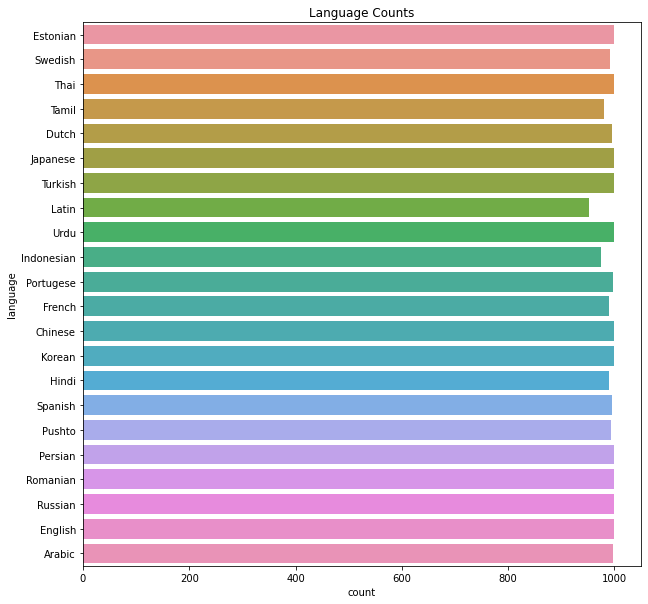

In [54]:
plt.figure(figsize=(10,10))
plt.title('Language Counts')
ax = sns.countplot(y = data['language'], data = data)
plt.show()

In [55]:
def remove_english(text):
  pat = '[a-zA-Z]+'
  text = re.sub(pat, "", text)
  return text

In [61]:
data_chinese = data[data['language'] == 'Chinese']
clean_text =  data.loc[data.language == 'Chinese']['clean_text']
clean_text = clean_text.apply(remove_english)
data_chinese.loc[:, 'clean_text'] = clean_text

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1773: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


In [63]:
data.drop(data[data['language'] == 'Chinese'].index, inplace = True, axis  = 0)
data = data.append(data_chinese)

In [65]:
#shuffling dataframe and resetting index
data = data.sample(frac=1).reset_index(drop= True)

Splitting into inputs and targets

In [67]:
x = data['clean_text']
cv= CountVectorizer()


In [68]:
x = cv.fit_transform(x)

In [69]:
x = x.astype('uint8')

In [71]:
y = data['language_encoder']

In [72]:
x_train, x_test, y_train, y_test = train_test_split(x, y , test_size = 0.2)

Creating a Naive Bayes Model

In [73]:
NB_model = MultinomialNB()

In [75]:
NB_model.fit(x_train, y_train)

MultinomialNB()

In [76]:
y_pred  = NB_model.predict(x_test)

In [77]:
accuracy_score(y_test, y_pred)

0.9604300091491308

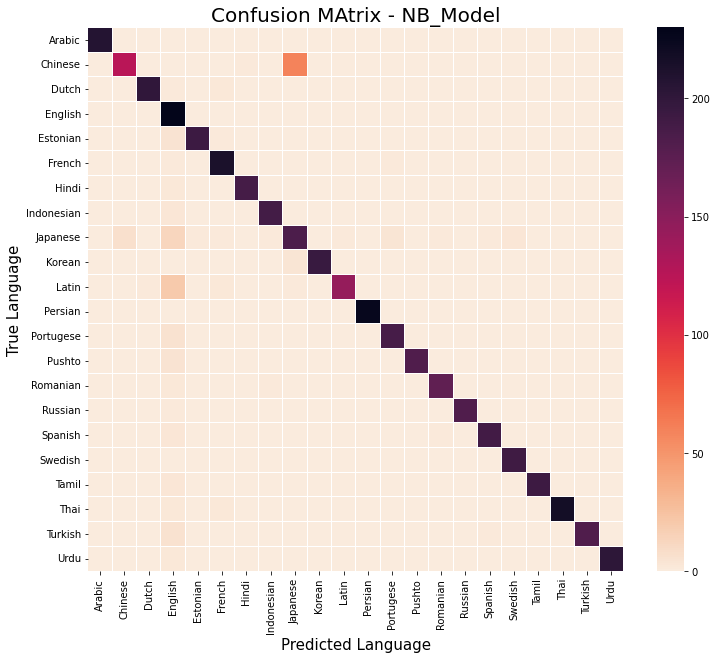

In [78]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(12,10))
plt.title('Confusion MAtrix - NB_Model', Fontsize=20)
sns.heatmap(cm, xticklabels=lang_list, yticklabels=lang_list, cmap = 'rocket_r', linecolor = 'white', linewidth = 0.005)
plt.xlabel('Predicted Language', fontsize = 15)
plt.ylabel('True Language', fontsize = 15)
plt.show()

In [80]:
print(classification_report(y_test,  y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       208
           1       0.95      0.67      0.79       186
           2       1.00      0.99      0.99       204
           3       0.75      1.00      0.86       230
           4       0.99      0.97      0.98       200
           5       0.96      0.99      0.98       215
           6       0.99      0.99      0.99       190
           7       0.99      0.98      0.99       192
           8       0.74      0.85      0.79       217
           9       1.00      0.98      0.99       199
          10       0.99      0.86      0.92       168
          11       1.00      1.00      1.00       226
          12       0.97      0.97      0.97       193
          13       1.00      0.97      0.99       187
          14       0.99      0.98      0.99       176
          15       1.00      0.99      1.00       183
          16       0.99      0.98      0.98       194
          17       0.98    